In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from pandas.tseries.offsets import DateOffset
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('Dataset.csv')
df.columns = ['Date','Close']
df.tail()

,Date,Close
725,27/12/15,1555.04
726,28/12/15,1573.17
727,29/12/15,1576.26
728,30/12/15,1582.27
729,31/12/15,1599.45


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Close
0,2014-01-01,1390.21
1,2014-02-01,1361.25
2,2014-03-01,1341.12
3,2014-04-01,1341.12
4,2014-05-01,1341.12


In [ ]:
df.set_index('Date', inplace=True)
df.head()


,Close
Date,
2014-01-01,1390.21
2014-02-01,1361.25
2014-03-01,1341.12
2014-04-01,1341.12
2014-05-01,1341.12


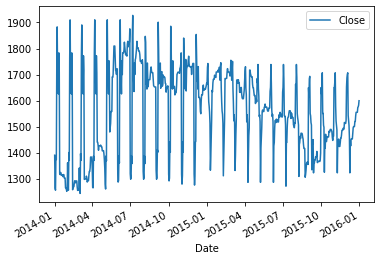

In [ ]:
df.plot()

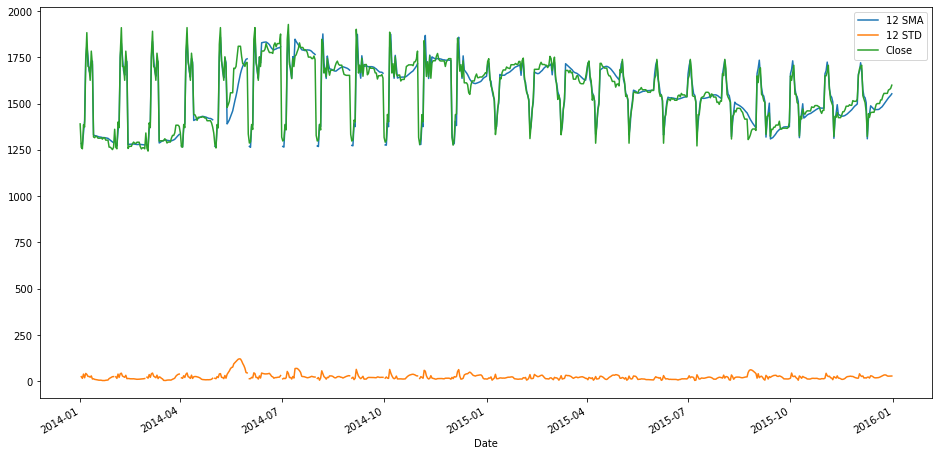

In [ ]:
df['Close'].rolling(12).mean().plot(label='12 SMA',figsize=(16,8))
df['Close'].rolling(12).std().plot(label='12 STD')
df['Close'].plot()
plt.legend()

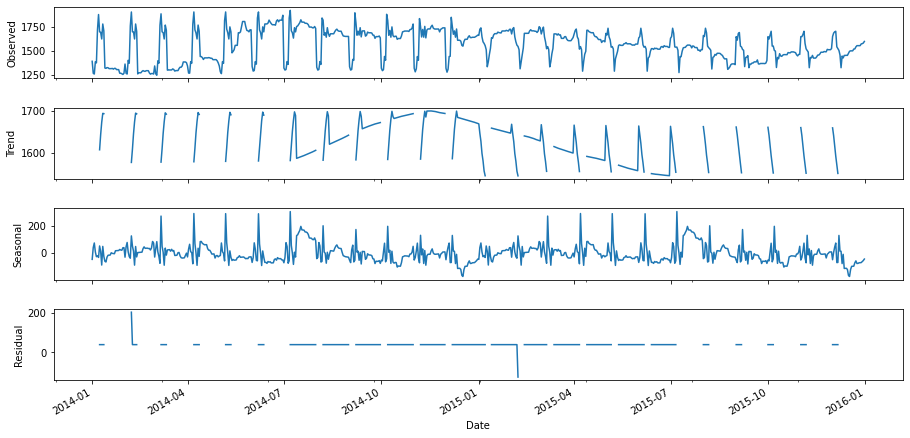

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df['Close'].dropna(),freq = 365)
fig=decomp.plot()
fig.set_size_inches(14,7)

In [ ]:
fuller_tst = adfuller(df['Close'])
fuller_tst

(-2.029974043811082,
 0.2735871010871551,
 3,
 726,
 {'1%': -3.4393893552577723,
  '10%': -2.5688943376666744,
  '5%': -2.8655292671104644},
 6063.256398212317)

In [ ]:
def test_p_value(data):
  fuller_tst=adfuller(data)
  print("P-Value: ",fuller_tst[1])
  if fuller_tst[1]<=0.05:
    print("Reject Null Hypothesis,data is stationary")
  else:
    print("Do not reject null Hypothesis, Data is not stationary")

In [ ]:
test_p_value(df['Close'])

P-Value:  0.2735871010871551
Do not reject null Hypothesis, Data is not stationary


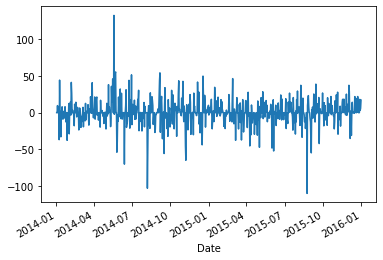

In [ ]:
df["First_diff"]= df['Close']-df['Close'].shift(1)
df["First_diff"].plot()

In [ ]:
test_p_value(df["First_diff"].dropna())

P-Value:  5.297100564206325e-25
Reject Null Hypothesis,data is stationary


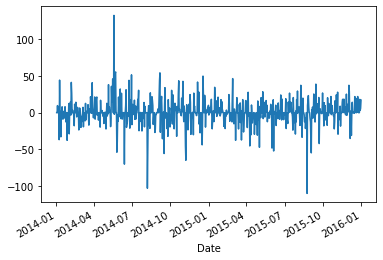

In [ ]:
df['Seasonal_diff']=df['Close']-df['Close'].shift(1)
df['Seasonal_diff'].plot()

In [ ]:
test_p_value(df["Seasonal_diff"].dropna())

P-Value:  5.297100564206325e-25
Reject Null Hypothesis,data is stationary


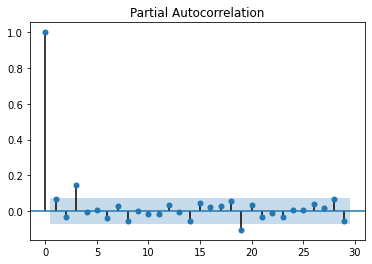

In [ ]:
First_diff=plot_pacf(df['First_diff'].dropna())

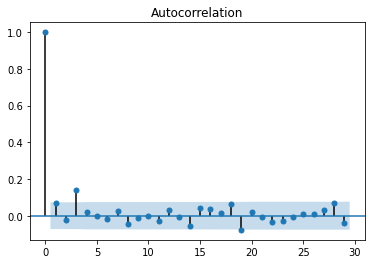

In [ ]:
First_diff=plot_acf(df['First_diff'].dropna())

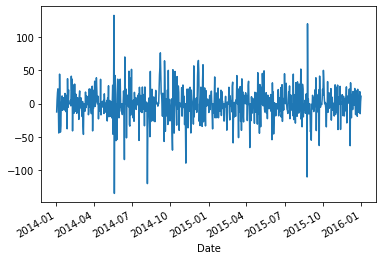

In [ ]:
df['Second_diff']=df['First_diff']-df['First_diff'].shift(1)
df['Second_diff'].plot()

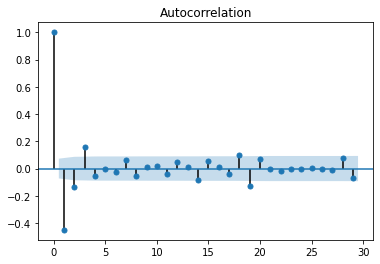

In [ ]:
Second_diff=plot_acf(df['Second_diff'].dropna())

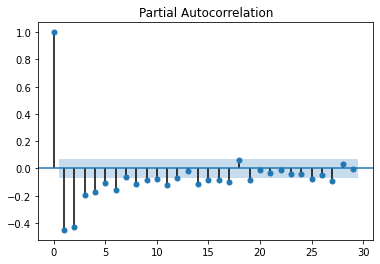

In [ ]:
Second_diff=plot_pacf(df['Second_diff'].dropna())

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Close'],order=(0,1,0),seasonal_order=(1,1,1,12))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  730
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood               -3091.989
Date:                            Tue, 05 Oct 2021   AIC                           6189.977
Time:                                    06:03:17   BIC                           6203.702
Sample:                                         0   HQIC                          6195.277
                                            - 730                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0356      0.049      0.729      0.466      -0.060       0.132
ma.S.L12      -0.9997      2.317     -0.432      0.666      -5.540       3.541
sigma2       304.7683    702.643      0.434      0.664   -1072.386    1681.923
===================================================================================
Ljung-Box (Q):                       46.04   Jarque-Bera (JB):              2501.83
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
results.resid

Date
2014-01-01    1390.210000
2014-02-01     -28.960000
2014-03-01     -20.130000
2014-04-01       0.000000
2014-05-01       0.000000
                 ...     
2015-12-27       0.613947
2015-12-28      17.391313
2015-12-29       1.495269
2015-12-30       7.834286
2015-12-31      16.509334
Length: 730, dtype: float64

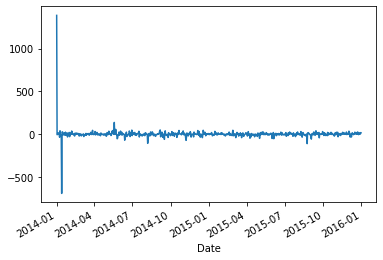

In [ ]:
results.resid.plot()

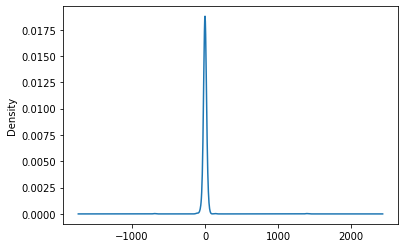

In [ ]:
results.resid.plot(kind='kde')

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Close'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


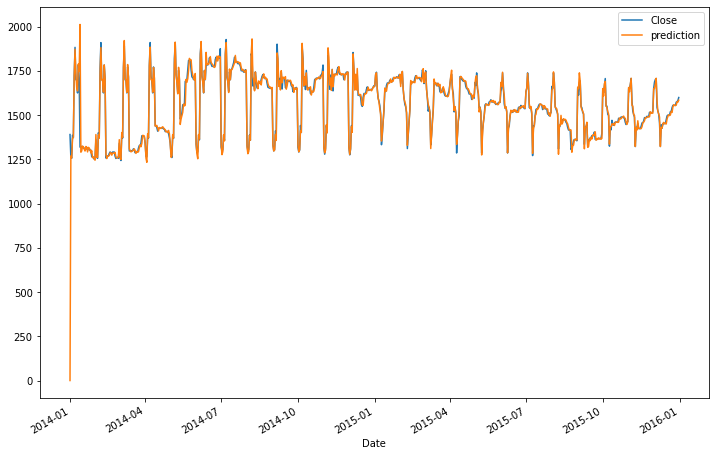

In [ ]:
df['prediction'] = results.predict()
df[['Close','prediction']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
extra_dates = [df.index[-1] + DateOffset(days=d) for d in range (1,30)]
extra_dates

[Timestamp('2016-01-01 00:00:00'),
 Timestamp('2016-01-02 00:00:00'),
 Timestamp('2016-01-03 00:00:00'),
 Timestamp('2016-01-04 00:00:00'),
 Timestamp('2016-01-05 00:00:00'),
 Timestamp('2016-01-06 00:00:00'),
 Timestamp('2016-01-07 00:00:00'),
 Timestamp('2016-01-08 00:00:00'),
 Timestamp('2016-01-09 00:00:00'),
 Timestamp('2016-01-10 00:00:00'),
 Timestamp('2016-01-11 00:00:00'),
 Timestamp('2016-01-12 00:00:00'),
 Timestamp('2016-01-13 00:00:00'),
 Timestamp('2016-01-14 00:00:00'),
 Timestamp('2016-01-15 00:00:00'),
 Timestamp('2016-01-16 00:00:00'),
 Timestamp('2016-01-17 00:00:00'),
 Timestamp('2016-01-18 00:00:00'),
 Timestamp('2016-01-19 00:00:00'),
 Timestamp('2016-01-20 00:00:00'),
 Timestamp('2016-01-21 00:00:00'),
 Timestamp('2016-01-22 00:00:00'),
 Timestamp('2016-01-23 00:00:00'),
 Timestamp('2016-01-24 00:00:00'),
 Timestamp('2016-01-25 00:00:00'),
 Timestamp('2016-01-26 00:00:00'),
 Timestamp('2016-01-27 00:00:00'),
 Timestamp('2016-01-28 00:00:00'),
 Timestamp('2016-01-

In [ ]:
forecast_df = pd.DataFrame(index=extra_dates,columns=df.columns)
forecast_df.head()  

,Close,First_diff,Seasonal_diff,Second_diff,prediction
2016-01-01,NaN,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN,NaN
2016-01-04,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_df = pd.concat([df,forecast_df])

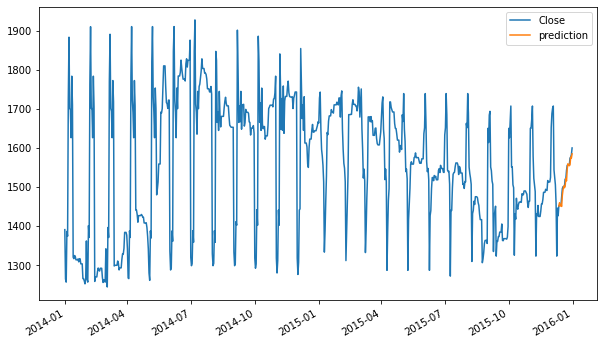

In [ ]:
final_df = pd.concat([df,forecast_df])
final_df['prediction'] = results.predict(start=700 , end=729)
final_df.drop(['First_diff','Seasonal_diff','Second_diff'],axis=1).plot(figsize=(10,6))
#final_df[['Close','prediction']].plot(figsize=(12,8))